<a href="https://colab.research.google.com/github/alettazz/SniffAndEnrich/blob/master/DBSCANcluster_with_KNNsmooth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN algorithm
**to test the dataset from 1 particular day**


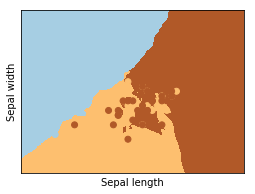

In [0]:


# Code source: Gael Varoqueux
# Modified for Documentation merge by Jaques Grobler
# License: BSD

import numpy as np
import pylab as pl
from sklearn import neighbors, datasets

# import some data to play with
iris = datasets.load_iris()
#iris = df3
X = iris.data[:, :2] # we only take the first two features. 
Y = iris.target



h = .02 # step size in the mesh

knn=neighbors.KNeighborsClassifier()

# we create an instance of Neighbours Classifier and fit the data.
knn.fit(X, Y)

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(4, 3))
pl.set_cmap(pl.cm.Paired)
pl.pcolormesh(xx, yy, Z)

# Plot also the training points
pl.scatter(X[:,0], X[:,1],c=Y )
pl.xlabel('Sepal length')
pl.ylabel('Sepal width')

pl.xlim(xx.min(), xx.max())
pl.ylim(yy.min(), yy.max())
pl.xticks(())
pl.yticks(())

pl.show()

# **DBSCAN**


```
#initialising drive and reading the file
```

In [0]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd


# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1ayd2rM3RX6hzIvQSSOl7bbfbe2g-fkeb' 
link = 'https://drive.google.com/open?id=10fMkS-CAUGcm-bBcAyrzjTtnoMb8Bj5G' 

fluff, id = link.split('=')

#print (id) 


downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('kedd_idosik_teljes_toKNN.csv')  
df3 = pd.read_csv('kedd_idosik_teljes_toKNN.csv')

#df3 = df3.tail(73).head(8)
print(df3)

          mac_address  ...             timespan
0   a8:7c:01:72:4f:9c  ...  28/02/2019 11:45:10
1   da:a1:19:24:f0:33  ...  28/02/2019 11:45:11
2   a8:7c:01:18:41:d9  ...  28/02/2019 11:45:12
3   48:88:1e:35:1e:57  ...  28/02/2019 11:45:13
4   48:88:af:87:c5:d2  ...  28/02/2019 11:45:14
5   00:0a:00:55:21:f6  ...  28/02/2019 11:45:15
6   10:8e:e0:2c:8f:c6  ...  28/02/2019 11:45:16
7   08:d4:13:02:93:44  ...  28/02/2019 11:45:17
8   c8:94:17:ea:13:d8  ...  28/02/2019 11:45:18
9   ec:10:14:12:40:84  ...  28/02/2019 11:45:19
10  38:d5:dd:45:6d:d1  ...  28/02/2019 11:45:20
11  10:8e:ba:8e:ed:e1  ...  28/02/2019 11:45:21
12  14:2d:27:db:fb:86  ...  28/02/2019 11:45:22
13  7c:2e:dd:e9:42:86  ...  28/02/2019 11:45:23

[14 rows x 7 columns]




```
# preparing the data for dbscan
```



In [0]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(df3.head())

#df3.drop(["mac address", "vendor"], axis = 1, inplace = True)

In [0]:
print(df3.head())

In [0]:
!pip install pyproj==1.9.6

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip



In [0]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

coords = df3.as_matrix(columns=['lat', 'lon'])

plt.figure(figsize = (12, 12))

m = Basemap(projection='merc', resolution='h', epsg=4900, 
            llcrnrlon=24.4,llcrnrlat=46.51, urcrnrlon=24.6,urcrnrlat=46.53)

# plot the aftershock
x, y = m(coords[:, 1], coords[:, 0])
m.scatter(x,y,5,marker='o',color='b')
m.arcgisimage(service='World_Shaded_Relief', xpixels = 5000, verbose= False)
    
plt.show()

scatter all the point simply that are on the specified interval

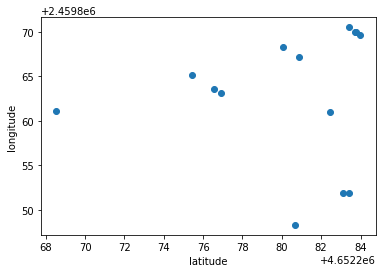

In [0]:
x = df3['LAT']*100000
y = df3['LON']*100000


plt.scatter(x,y)
plt.xlabel("latitude")
plt.ylabel("longitude")

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


 Original 
[[46.52284  24.598696]
 [46.52284  24.5987  ]
 [46.522808 24.598484]
 [46.522755 24.598652]
 [46.52277  24.59863 ]
 [46.522835 24.598705]
 [46.52284  24.5987  ]
 [46.522808 24.598671]
 [46.522686 24.59861 ]
 [46.522823 24.59861 ]
 [46.522835 24.598518]
 [46.522766 24.598637]
 [46.5228   24.598682]
 [46.52283  24.598518]]
 Scaled 
[[ 0.8483737   0.9255414 ]
 [ 0.8483737   0.9788648 ]
 [ 0.13395375 -2.0339057 ]
 [-1.1162812   0.31232262]
 [-0.75907123  0.01904406]
 [ 0.75907123  1.0588498 ]
 [ 0.8483737   0.9788648 ]
 [ 0.13395375  0.57893944]
 [-2.723726   -0.27423447]
 [ 0.49116373 -0.27423447]
 [ 0.75907123 -1.5539954 ]
 [-0.8483737   0.09902912]
 [-0.04465125  0.73890954]
 [ 0.66976875 -1.5539954 ]]
[array([[ 0.13395375, -2.0339057 ],
       [-2.723726  , -0.27423447],
       [ 0.49116373, -0.27423447]], dtype=float32)]


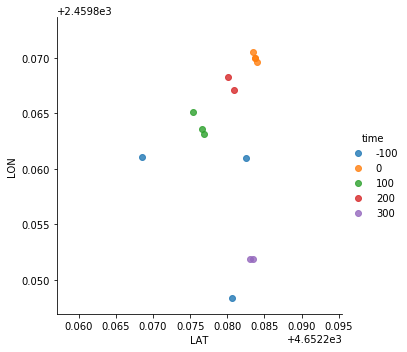

In [0]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd


df = df3[["LAT", "LON"]]
df = df.as_matrix().astype("float32", copy = False)

print(" Original ")
print(df)
stscaler = StandardScaler().fit(df)
df = stscaler.transform(df)

print(" Scaled ")

print(df)


dbsc = DBSCAN(eps = .4, min_samples = 2, algorithm='auto').fit(df)

labels = dbsc.labels_

#print(labels)
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

cluster_labels = dbsc.labels_
n_clusters = len(set(cluster_labels))

# get the cluster
# cluster_labels = -1 means outliers
clusters = \
    pd.Series([df[cluster_labels == n] for n in range(-1, n_clusters)])
print([df[cluster_labels == -1]])


filtro=list(labels)

df3["time"]=filtro


x = df3['LAT']
y = df3['LON']


sns.lmplot("LAT","LON",data=df3*100,fit_reg=False,hue="time")

#plt.show()





# KNN for the outliers from DBSCAN


In [0]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 



```
# get the data from a timeframe, both the train data (where there are correct labels) and the test thata that contains the outliers
```



In [0]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd


# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1W3wmXCbxRxKzytVZx4dimYmovPwS0riv' 

fluff, id = link.split('=')


#print (id) 


downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('kedd_idosik_teljes_toKNN_TEST.csv')  
df_test = pd.read_csv('kedd_idosik_teljes_toKNN_TEST.csv')


print(df_test)

link = 'https://drive.google.com/open?id=16_82A9ne2LPlvpHFenuSXmhsxfhRWu-7'
fluff, id = link.split('=')


#print (id) 


downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('kedd_idosik_teljes_toKNN_TRAIN.csv')  
df_train = pd.read_csv('kedd_idosik_teljes_toKNN_TRAIN.csv')

print(df_train)

     |████████████████████████████████| 993kB 2.8MB/s 
   id        mac_address  ... cluster             timespan
0   1  a8:7c:01:18:41:d9  ...      -1  28/02/2019 11:45:12
1   2  c8:94:17:ea:13:d8  ...      -1  28/02/2019 11:45:18
2   3  ec:10:14:12:40:84  ...      -1  28/02/2019 11:45:19

[3 rows x 8 columns]
    id        mac_address  ... cluster             timespan
0    1  a8:7c:01:72:4f:9c  ...       1  28/02/2019 11:45:10
1    2  da:a1:19:24:f0:33  ...       1  28/02/2019 11:45:11
2    3  00:0a:00:55:21:f6  ...       1  28/02/2019 11:45:15
3    4  10:8e:e0:2c:8f:c6  ...       1  28/02/2019 11:45:16
4    5  48:88:1e:35:1e:57  ...       2  28/02/2019 11:45:13
5    6  48:88:af:87:c5:d2  ...       2  28/02/2019 11:45:14
6    7  10:8e:ba:8e:ed:e1  ...       2  28/02/2019 11:45:21
7    8  08:d4:13:02:93:44  ...       3  28/02/2019 11:45:17
8    9  14:2d:27:db:fb:86  ...       3  28/02/2019 11:45:22
9   10  38:d5:dd:45:6d:d1  ...       4  28/02/2019 11:45:20
10  11  7c:2e:dd:e9:42:86  



```
# preprocess the both datasets
```



In [0]:
import numpy as np
X = df_train.iloc[:, :-1].values  

X = df_train[["time",
    "LAT", "LON"]]

y = df_train.iloc[:, 6].values

y_train = y
print(y_train)

X['time'] = pd.to_datetime(X['time'])
X['time'] = X.time.values.astype(np.int64)
X = X.as_matrix().astype("float64", copy = False)

X_train = X
print(X_train)

[1 1 1 1 2 2 2 3 3 4 4]
[[1.55135431e+18 4.65228399e+01 2.45986967e+01]
 [1.55135432e+18 4.65228374e+01 2.45987001e+01]
 [1.55135449e+18 4.65228341e+01 2.45987049e+01]
 [1.55135469e+18 4.65228376e+01 2.45987002e+01]
 [1.55135440e+18 4.65227541e+01 2.45986515e+01]
 [1.55135442e+18 4.65227690e+01 2.45986316e+01]
 [1.55135486e+18 4.65227654e+01 2.45986362e+01]
 [1.55135474e+18 4.65228087e+01 2.45986713e+01]
 [1.55135490e+18 4.65228005e+01 2.45986826e+01]
 [1.55135482e+18 4.65228340e+01 2.45985190e+01]
 [1.55135492e+18 4.65228311e+01 2.45985191e+01]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [0]:
X = df_test.iloc[:, :-1].values  

X = df_test[["time",#
    "LAT", "LON"]]

y = df_test.iloc[:, 5].values

X_test = X

X['time'] = pd.to_datetime(X['time'])
X['time'] = X.time.values.astype(np.int64)
X = X.as_matrix().astype("float64", copy = False)
#y_test = y
print(y_test)
print(X_test)
      
      


In [0]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

print("X_train \n")
print(X_train)

print("X_test \n")
print(X_test)



```
# training on KNN 
```



In [0]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=4, leaf_size=15,metric='euclidean')  
classifier.fit(X_train, y_train)  

y_pred = classifier.predict(X_test) 

X_test_original = scaler.inverse_transform(X_test)
print(X_test)

print(y_pred)

[[-1.00719024 -0.11061492 -2.51128532]
 [ 0.82042386 -3.96465498 -0.55225973]
 [ 0.82478571  0.45803478 -0.56734337]]
[2 2 3]


test data

[2 2 3]
